# 23/10/07

I am going to try and load all the data in one notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Demolition
df_demolition = pd.read_csv('data/raw/demolition/demolition.csv')

In [ ]:
# Improvement
df_improvement = pd.read_csv('data/raw/improvement/improvement.csv')

In [ ]:
# New Residential
df_new_residential = pd.read_csv('data/raw/new/residential/new_residential.csv')

In [ ]:
# New Non-Residential
df_new_non_residential = pd.read_csv('data/raw/new/non_residential/new_non_residential.csv')

Alright cool

In [2]:
df_source = pd.read_csv('data/raw/union_set.csv')

In [3]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426209 entries, 0 to 426208
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PermitNum          426209 non-null  object
 1   AppliedDate        426209 non-null  object
 2   PermitType         426209 non-null  object
 3   PermitTypeMapped   426209 non-null  object
 4   PermitClass        426160 non-null  object
 5   PermitClassGroup   426209 non-null  object
 6   PermitClassMapped  426209 non-null  object
 7   WorkClass          426209 non-null  object
 8   WorkClassGroup     426209 non-null  object
 9   WorkClassMapped    423261 non-null  object
 10  Description        385293 non-null  object
dtypes: object(11)
memory usage: 35.8+ MB


In [4]:
print(df_source['WorkClassGroup'].unique())
print(df_source['PermitClassMapped'].unique())

['New' 'Demolition' 'Unspecified' 'Improvement']
['Residential' 'Non-Residential' 'Unspecified']


So, we want 4 different designations of permit: demolition, improvement, new_residential, new_non_residential. Lets create a function that returns us a designation depending on what row was put in.

In [3]:
def designation(series) :
    workClassGroup = series['WorkClassGroup']
    permitClassMapped = series['PermitClassMapped']
    if workClassGroup == 'Demolition' : return 'demolition'
    if workClassGroup == 'Improvement' : return 'improvement'
    if workClassGroup == 'New' :
        if permitClassMapped == 'Residential' : return 'new_residential'
        if permitClassMapped == 'Non-Residential' : return 'new_non_residential'
    return None

In [4]:
df = df_source.copy()

In [5]:
df['Designation'] = df.apply(designation, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426209 entries, 0 to 426208
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PermitNum          426209 non-null  object
 1   AppliedDate        426209 non-null  object
 2   PermitType         426209 non-null  object
 3   PermitTypeMapped   426209 non-null  object
 4   PermitClass        426160 non-null  object
 5   PermitClassGroup   426209 non-null  object
 6   PermitClassMapped  426209 non-null  object
 7   WorkClass          426209 non-null  object
 8   WorkClassGroup     426209 non-null  object
 9   WorkClassMapped    423261 non-null  object
 10  Description        385293 non-null  object
 11  Designation        423095 non-null  object
dtypes: object(12)
memory usage: 39.0+ MB


In [6]:
df.dropna(subset=['Designation'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423095 entries, 0 to 426208
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PermitNum          423095 non-null  object
 1   AppliedDate        423095 non-null  object
 2   PermitType         423095 non-null  object
 3   PermitTypeMapped   423095 non-null  object
 4   PermitClass        423046 non-null  object
 5   PermitClassGroup   423095 non-null  object
 6   PermitClassMapped  423095 non-null  object
 7   WorkClass          423095 non-null  object
 8   WorkClassGroup     423095 non-null  object
 9   WorkClassMapped    423095 non-null  object
 10  Description        382913 non-null  object
 11  Designation        423095 non-null  object
dtypes: object(12)
memory usage: 42.0+ MB


In [7]:
df['AppliedDate'] = pd.to_datetime(df['AppliedDate'])

In [8]:
labels = ['Demolition','Improvement','New Residential','New Non-Residential','Additional Dwelling']
colors = ['dimgrey',   'plum',       'lightskyblue',    'palegreen',          'cornflowerblue']
color_dict = dict(zip(labels,colors))

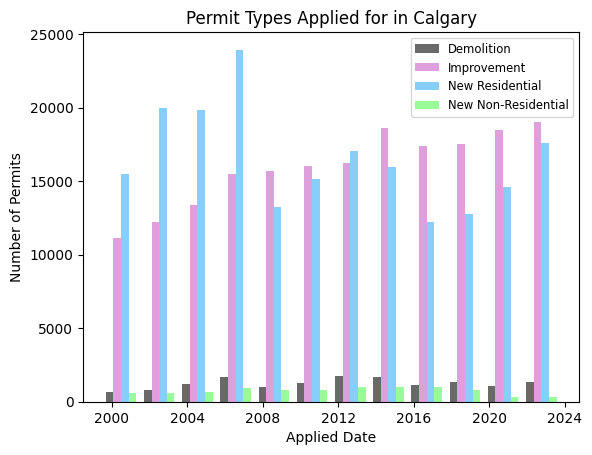

In [70]:
input_labels = ['Demolition','Improvement','New Residential','New Non-Residential']
plt.hist(x=[ df[df['Designation'] == 'demolition']['AppliedDate'],
             df[df['Designation'] == 'improvement']['AppliedDate'],
             df[df['Designation'] == 'new_residential']['AppliedDate'],
             df[df['Designation'] == 'new_non_residential']['AppliedDate'] ],
         bins=12, color=[color_dict[temp] for temp in input_labels], label=input_labels)
plt.legend(fontsize='small')
plt.title('Permit Types Applied for in Calgary')
plt.xlabel('Applied Date')
plt.ylabel('Number of Permits')
plt.savefig('figures/all_types_hist.png')

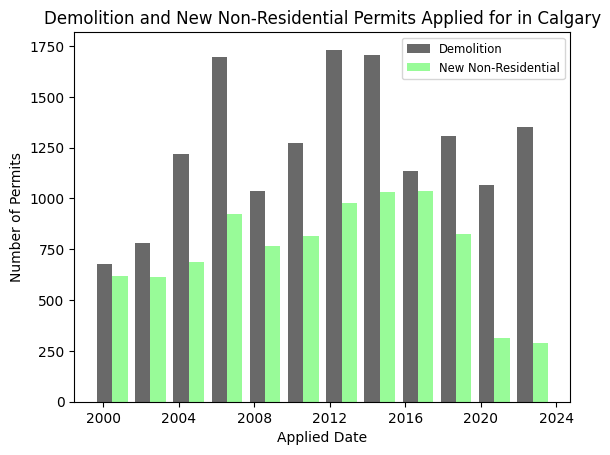

In [60]:
input_labels = ['Demolition', 'New Non-Residential']
plt.hist(x=[ df[df['Designation'] == 'demolition']['AppliedDate'],
             df[df['Designation'] == 'new_non_residential']['AppliedDate'] ],
         bins=12, color=[color_dict[temp] for temp in input_labels], label=input_labels)
plt.legend(fontsize='small')
plt.title('Demolition and New Non-Residential Permits Applied for in Calgary')
plt.xlabel('Applied Date')
plt.ylabel('Number of Permits')
plt.savefig('figures/demolition_new_non_residential_hist.png')

I'd like to overlay `additional dwellings` onto these graphs

In [46]:
print(df['PermitClassGroup'].unique())

['Single Family' 'Two Family' 'Garage' 'Commercial' 'Additional Dwelling'
 'Apartment' 'Unspecified' 'Secondary Suites' 'Townhouse' 'General'
 'Institutional' 'Industrial' 'Government' 'Swimming Pool'
 'Special Function Ten' 'Retaining Wall']


In [12]:
# new designation to allow for additional dwellings
def designation2(series) :
    workClassGroup = series['WorkClassGroup']
    permitClassMapped = series['PermitClassMapped']
    permitClassGroup = series['PermitClassGroup']
    if permitClassGroup == 'Additional Dwelling' or permitClassGroup == 'Secondary Suites' : return 'additional_dwelling'
    if workClassGroup == 'Demolition' : return 'demolition'
    if workClassGroup == 'Improvement' : return 'improvement'
    if workClassGroup == 'New' :
        if permitClassMapped == 'Residential' : return 'new_residential'
        if permitClassMapped == 'Non-Residential' : return 'new_non_residential'
    return None

In [13]:
df['Designation'] = df.apply(designation2, axis=1)

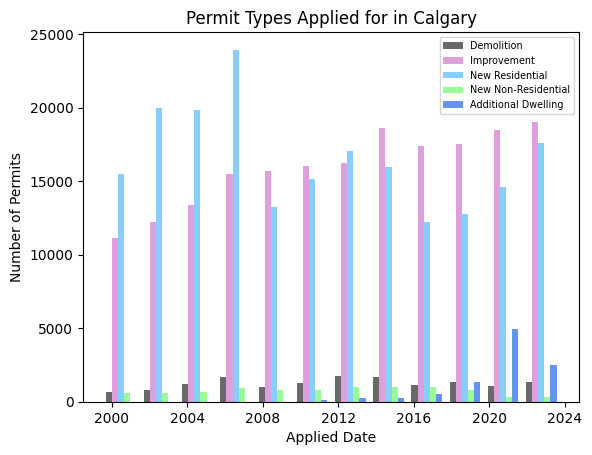

In [71]:
plt.hist(x=[ df[df['Designation'] == 'demolition']['AppliedDate'],
             df[df['Designation'] == 'improvement']['AppliedDate'],
             df[df['Designation'] == 'new_residential']['AppliedDate'],
             df[df['Designation'] == 'new_non_residential']['AppliedDate'],
             df[df['Designation'] == 'additional_dwelling']['AppliedDate'] ],
         bins=12, color=colors, label=labels)
plt.legend(fontsize='x-small')
plt.title('Permit Types Applied for in Calgary')
plt.xlabel('Applied Date')
plt.ylabel('Number of Permits')
plt.savefig('figures/all_types_w_additional_dwellings_hist.png')

In [1]:
input_labels = ['Additional Dwellings']
plt.hist(x=df[df['Designation'] == 'additional_dwelling']['AppliedDate'],
         bins=12, color=color_dict['Additional Dwelling'], label=input_labels)
plt.legend(fontsize='x-small')
plt.title('Permit Types Applied for in Calgary')
plt.xlabel('Applied Date')
plt.ylabel('Number of Permits')
plt.savefig('figures/additional_dwellings_hist.png')

NameError: name 'plt' is not defined

# 23/10/09

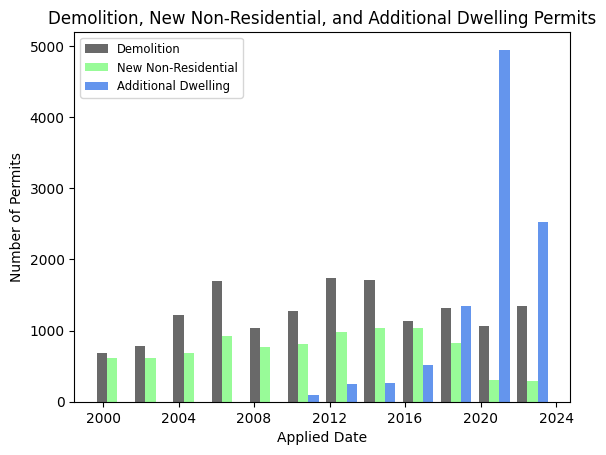

In [15]:
input_labels = ['Demolition', 'New Non-Residential', 'Additional Dwelling']
plt.hist(x=[ df[df['Designation'] == 'demolition']['AppliedDate'],
             df[df['Designation'] == 'new_non_residential']['AppliedDate'],
             df[df['Designation'] == 'additional_dwelling']['AppliedDate'] ],
         bins=12, color=[color_dict[temp] for temp in input_labels], label=input_labels)
plt.legend(fontsize='small')
plt.title('Demolition, New Non-Residential, and Additional Dwelling Permits')
plt.xlabel('Applied Date')
plt.ylabel('Number of Permits')
plt.savefig('figures/demo_new_non_addit_dwell_hist.png')